# Technical Assesment - Juan David García Castro. 

In [65]:
import pandas as pd
import numpy as np
import itertools
import warnings
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv('./input (1).csv')

In [61]:
df.columns

Index(['dt', 'grp_A_1', 'grp_B_1', 'grp_A_2', 'grp_B_2', 'grp_A_3', 'grp_B_3',
       'grp_A_4', 'grp_B_4', 'grp_A_5',
       ...
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'units_sold'],
      dtype='object', length=129)

In [60]:
df.tail()

,dt,grp_A_1,grp_B_1,grp_A_2,grp_B_2,grp_A_3,grp_B_3,grp_A_4,grp_B_4,grp_A_5,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,units_sold
748,29/07/2019,260.50,70.91,13397.0,66.867857,6058.428571,41.346429,2484.0,28.017857,228112.4286,...,29.0,0.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,182.0
749,30/07/2019,249.50,70.70,13008.0,66.110714,5902.857143,38.817857,2468.0,28.660714,221786.8571,...,30.0,1.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0
750,31/07/2019,238.50,70.48,12619.0,65.353571,5747.285714,36.289286,2452.0,29.303571,215461.2857,...,31.0,2.0,212.0,1.0,0.0,0.0,0.0,0.0,0.0,133.0
751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,NaN,-0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.rename(columns={'dt': 'date','units_sold':'sales'},inplace=True)

In [34]:
df = df[['sales','date']]

## Based on time series forecasting literature, in order to obtain the sales forecast we only need the sales column and the date column, no other feature is needed for the **SARIMAX** model that we are going to use. 

In [35]:
df.head()

,sales,date
0,17.0,11/7/2017
1,23.0,12/7/2017
2,19.0,13/07/2017
3,15.0,14/07/2017
4,18.0,15/07/2017


In [36]:
df['date'] = pd.to_datetime(df['date'])

In [37]:
df.head()

,sales,date
0,17.0,2017-11-07
1,23.0,2017-12-07
2,19.0,2017-07-13
3,15.0,2017-07-14
4,18.0,2017-07-15


In [38]:
df.set_index('date',inplace=True)

## We need the prediction for August, September and Octuber for the year 2019. Our data is daily basis so we need to resample the data to  a month basis. For this we will take the mean of the sales of each month. 

In [39]:
df = df.resample('M').mean()

In [40]:
df.drop(df.tail(5).index,inplace=True) # drop last n rows

In [41]:
df.tail()

,sales
date,
2019-03-31,66.346154
2019-04-30,85.320000
2019-05-31,128.846154
2019-06-30,155.080000
2019-07-31,154.307692


In [42]:
fig = px.line(df,x = df.index ,y='sales')
fig.update_layout(title='Mean Sales by month',  
                  xaxis_title="Months",
                  yaxis_title=" Mean units sold by month"
                  )
fig.show()

In [43]:
fig = px.bar(df, x=df.index, y="sales")
fig.update_layout(title='Mean Sales by month',  
                  xaxis_title="Months",
                  yaxis_title=" Mean units sold by month"
                  )
fig.show()

## As it can be seen the data is seasonal. There are picks during summer and by the end of the year the sales drop down. This is why we are going to use the SARIMAX model. The **S** of SARIMAX stands for **Seasonal**. We can also use ARIMA model but for that we need our data to be stationary.  

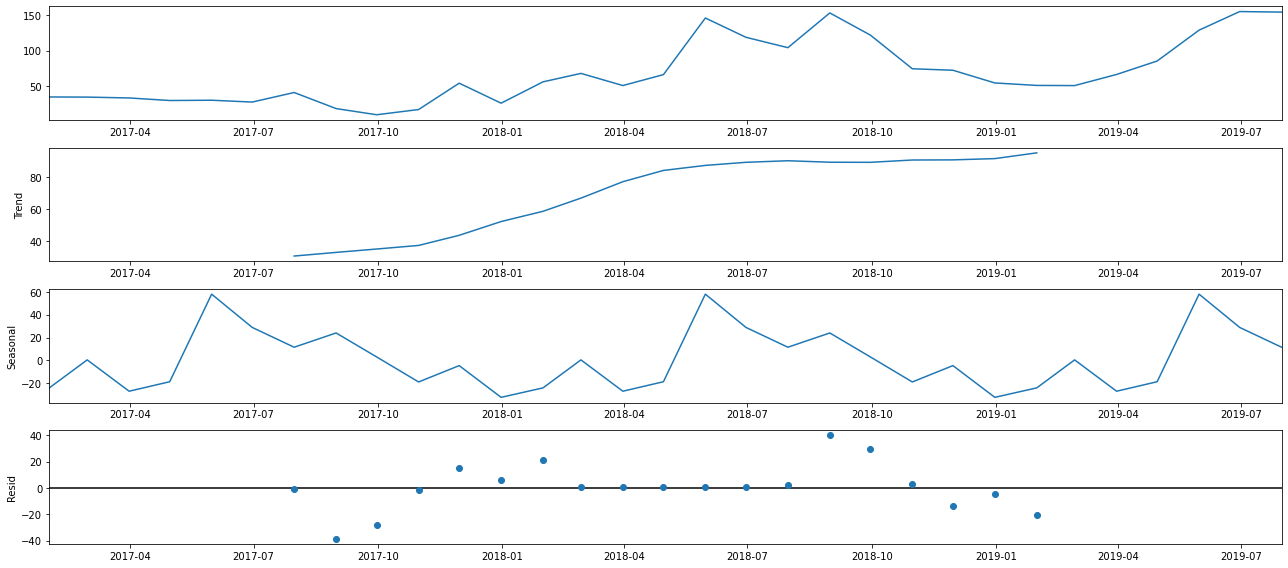

In [44]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

## This figure confirms that is a trend on the sales as also a seasonality of our data during the summer. 

# SARIMAX MODEL

## Estimating the p,q and d parameters. 

In [45]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [46]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:352.0267844800324
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:215.70294009119323
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:201.5827936370673
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:60.32837959942994
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:211.04398161009894
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:203.3258657313118
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:68.76098222469014
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:62.313357668901205
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:316.12419065232143
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:188.97270252542083
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:179.4452314310306
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:53.24762665443723
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:201.04714388083812
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:182.85819589018848
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:70.45725004715703
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:54.1703128658072
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:275.3940311853953
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:167.9816906434053
ARIM

## The parameters combination that obtains the lowest AIC score are (0, 1, 1) x (0, 1, 1, 12)

## **SARIMAX MODEL FIT**

In [47]:
# ARIMA(0, 1, 1)x(0, 1, 1, 12)12 
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2103      0.363     -0.579      0.562      -0.922       0.501
sigma2      1534.0021    643.328      2.384      0.017     273.103    2794.901


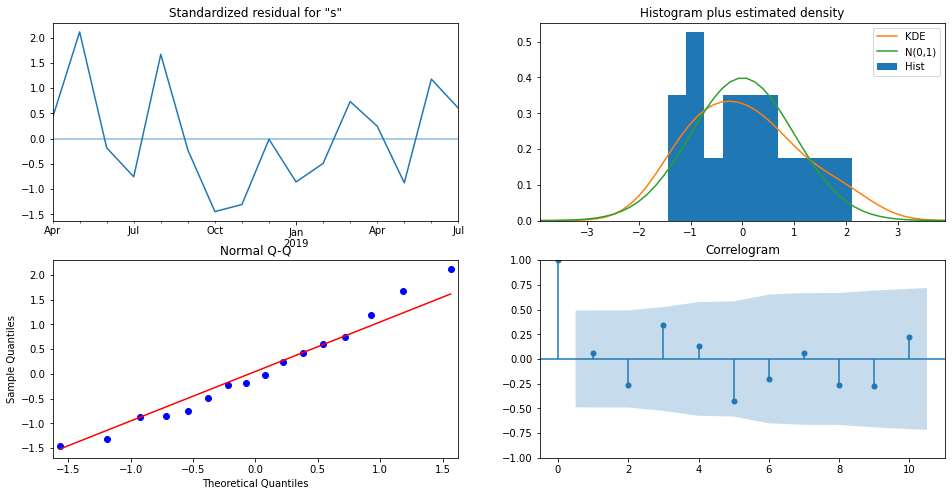

In [48]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## The Normal Q-Q plot shows that the ordered distribution of residuals follows the distribution similar to normal distribution as can be seen also in the histogram. Thus, our model seems to have a good performance.

## **Evaluation metrics** (RMSE and MAPE). 

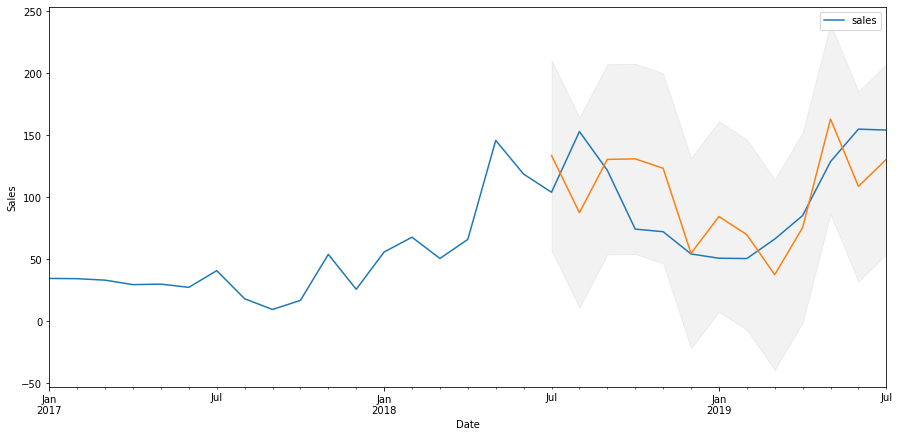

Root Mean Squared Error:  36.548343391859


In [49]:
# Model Prediction
# Predictions are performed for the 11th Jan' 2015 onwards of the train data.
pred = results.get_prediction(start=pd.to_datetime('2018-07-31'), dynamic = False)
# Get confidence intervals of forecasts
pred_ci = pred.conf_int()
ax = df["2017":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
plt.legend
plt.show()
df_forecasted = pred.predicted_mean
df_truth = df["2018-07-31":]
# Calculating the error
rms = sqrt(mean_squared_error(df_truth, df_forecasted))
print("Root Mean Squared Error: ", rms)

## For a base model, a  Root Mean Squared Error **(RMSE)**  of **36.5** is a good result. The predictions  may not seem to fit the data as good as expected but at least it predicts the seasonality during the summer and the drop of the sales during the begin of the year. 

## **Mean Absolute Percentage Error**

In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [75]:
mape= mean_absolute_percentage_error(df_truth.values, df_forecasted.values)
print("mean_absolute_percentage_error: ", mape)

mean_absolute_percentage_error:  53.59205306450476


## **Forecasting future sales**. 

In [50]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [51]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [52]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:title={'center':'Forecasting sales'}, xlabel='Months', ylabel='Mean Sales'>

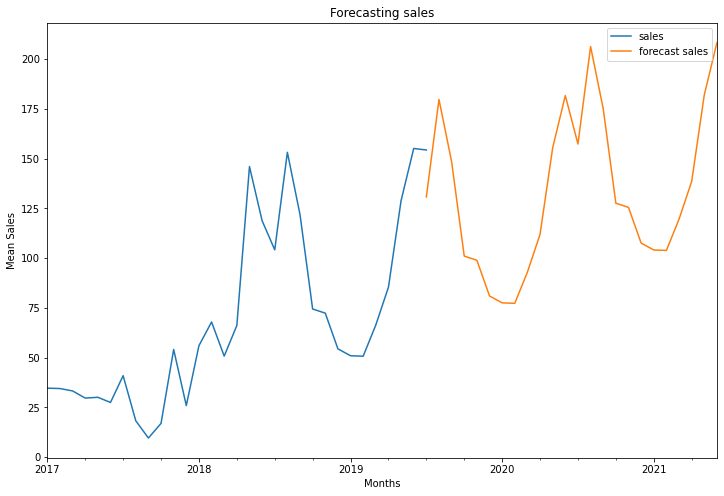

In [53]:
future_df['forecast sales'] = results.predict(start = 30, end = 54, dynamic= True)  
future_df[['sales', 'forecast sales']].plot(figsize=(12, 8),
                                  title = 'Forecasting sales',
                                  xlabel = 'Months',
                                  ylabel = 'Mean Sales')
                                  

In [55]:
print('During August 2019 the average sales are expected to be {} units.'.format(round(future_df.loc['2019-08-31']['forecast sales'])))

During August 2019 the average sales are expected to be 180 units.


In [56]:
print('During September 2019 the average sales are expected to be {} units.'.format(round(future_df.loc['2019-09-30']['forecast sales'])))

During September 2019 the average sales are expected to be 148 units.


In [57]:
print('During October 2019 the average sales are expected to be {} units.'.format(round(future_df.loc['2019-10-31']['forecast sales'])))

During October 2019 the average sales are expected to be 101 units.
